# Disadvantaged Communities SB #535 Data

Part 1: This data is from the Southern California Association of Governments on disadvantaged communties in City of Long Beach and Los Angeles.The diasadvantged communties are measured through pollution (i.e. ozone percentile)and different measure to determine whether or not they are labeled as disadvantaged community. I will be using spatial data, therefore it will be helpful to start off with geopandas library 

Part 2: For part two we will create an isochrone map for the City of Huntington Park, since it is the city near 3 designated Transit oriented districts.

In [97]:

import geopandas as gpd

Next, I will import my data which is a geoson file. To provide a relative pathin order to name/label the date.

In [98]:
SBDA = gpd.read_file('SB_535_Disadvantaged_Areas.geojson')

We have now identified the class type

In [99]:
type(SBDA)

geopandas.geodataframe.GeoDataFrame

This allows us access to the data from geopanda

In [100]:
SBDA.head()

,OBJECTID,GEOID10,Percentile_Range,Population,County,ZIP,City,CIscoreP,Ozone,Ozone_Pctl,...,African_American____,Native_American____,Asian_American____,Other____,MPO,Year,Disadv,Shapearea,Shapelen,geometry
0,3,6025011600,86-90%,6310,Imperial,92243,El Centro,86,0.055,78,...,1.6,0.2,0.7,0.9,SCAG,2017,yes,2.052600e+06,5802.261796,"POLYGON ((-115.56966 32.78150, -115.55242 32.7..."
1,4,6025011500,91-95%,6232,Imperial,92243,El Centro,91,0.055,78,...,2.1,0.4,1.1,0.8,SCAG,2017,yes,2.048507e+06,6463.087503,"POLYGON ((-115.55686 32.80780, -115.55671 32.8..."
2,5,6025011400,96-100% (highest scores),4580,Imperial,92243,El Centro,95,0.055,78,...,5.3,0.1,0.1,0.4,SCAG,2017,yes,3.995656e+06,8595.491140,"POLYGON ((-115.55242 32.78149, -115.53540 32.7..."
3,7,6025010500,76-80%,6593,Imperial,92227,Brawley,77,0.051,69,...,1.6,0.5,1,1.1,SCAG,2017,yes,3.631895e+06,8591.647069,"POLYGON ((-115.53527 33.00013, -115.53614 32.9..."
4,8,6025010400,86-90%,7162,Imperial,92227,Brawley,87,0.051,69,...,1.4,0.2,0.2,0.5,SCAG,2017,yes,6.161688e+06,10263.355253,"POLYGON ((-115.52830 33.00485, -115.52877 33.0..."


We now see rows highlighting the disadvantaged communties data for the City of Los Angeles and the City of Long Beach

Next, I will use .info which summarizes the information in the dataset

In [101]:
SBDA.info

<bound method DataFrame.info of       OBJECTID     GEOID10          Percentile_Range  Population       County  \
0            3  6025011600                    86-90%        6310    Imperial    
1            4  6025011500                    91-95%        6232    Imperial    
2            5  6025011400  96-100% (highest scores)        4580    Imperial    
3            7  6025010500                    76-80%        6593    Imperial    
4            8  6025010400                    86-90%        7162    Imperial    
...        ...         ...                       ...         ...          ...   
1364      3912  6037481603                    76-80%        3802  Los Angeles   
1365      3923  6037404402                    86-90%        5107  Los Angeles   
1366      3949  6037431100                    76-80%        6629  Los Angeles   
1367      3950  6037533603  96-100% (highest scores)        6617  Los Angeles   
1368      3951  6037534101  96-100% (highest scores)        2295  Los Angeles

What the dataset reveals, is the shapelength, county, city, zipcodes, race and other detailed data.

In [103]:
SBDA.shape

(1369, 65)

With the call to the shape command, it shows that there are 1369 rows of data with 65 columns. We then use the .plot command to visualize the data in a map. This map in particular highlights the caputured data from the City of Los Angeles (top shape) and City of Long Beach (bottom shape)

<AxesSubplot:>

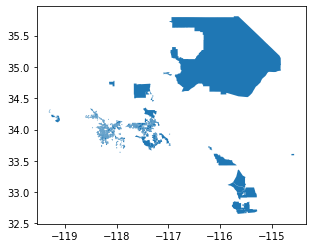

In [104]:

SBDA.plot()

In [105]:
SBDA['City'].value_counts()

Los Angeles       380
Long Beach         57
Riverside          45
San Bernardino     36
Ontario            32
                 ... 
Hesperia            1
Baker               1
Orange              1
Highland            1
Monrovia            1
Name: City, Length: 116, dtype: int64

The output that we see is the two cities that I commanded.

I will be creating columns to capture specific data. 

In [106]:

SBDA[['Population', 'Ozone','Ozone_Pctl','City','ZIP']]  

,Population,Ozone,Ozone_Pctl,City,ZIP
0,6310,0.055,78,El Centro,92243
1,6232,0.055,78,El Centro,92243
2,4580,0.055,78,El Centro,92243
3,6593,0.051,69,Brawley,92227
4,7162,0.051,69,Brawley,92227
...,...,...,...,...,...
1364,3802,0.050,65,Alhambra,91801
1365,5107,0.053,74,Azusa,91702
1366,6629,0.053,74,Monrovia,91016
1367,6617,0.046,53,Bell,90201


In visual form, we see the output shows population size, ozone, ozone percentile, city, and zipcode.

In [19]:
SBDA.columns.to_list()


['OBJECTID',
 'GEOID10',
 'Percentile_Range',
 'Population',
 'County',
 'ZIP',
 'City',
 'CIscoreP',
 'Ozone',
 'Ozone_Pctl',
 'PM2_5',
 'PM_2_5_Pctl',
 'Diesel_PM_Pctl',
 'DrinkingWater_Pctl',
 'Pesticides',
 'Pesticides_Pctl',
 'Tox_Releases',
 'Tox_Releases_Pctl',
 'Traffic',
 'Traffic_Pctl',
 'Cleanups',
 'Cleanups_Pctl',
 'GroundwaterThreats',
 'GroundWater_Threats_Pctl',
 'Haz_Waste',
 'Haz_Waste_Pctl',
 'Imp__Water_Bodies',
 'Imp__Water_Bodies_Pctl',
 'Solid_Waste',
 'Solid_Waste_Pctl',
 'PollutionScore',
 'Pollution_Burden_Pctl',
 'Asthma',
 'Asthma_Pctl',
 'Low_Birth_Weight',
 'Low_Birth_Weight_Pctl',
 'Cardiovascular',
 'Cardiovascular_Pctl',
 'Education',
 'Education_Pctl',
 'Linguistic_Isolation',
 'Linguistic_Isolation_Pctl',
 'Poverty',
 'Poverty_Pctl',
 'Unemployment',
 'Unemployment_Pctl',
 'Housing_Burden',
 'Housing_Burden_Pctl',
 'PopCharScore',
 'Pop__Characteristics_Pctl',
 'Children___10____',
 'Pop_11_64_years____',
 'Elderly___65____',
 'Hispanic____',
 'White_

With calling the columns we can now focus which column topic focus on for the ischronic map, since my final project focuses on  transit oriented  we can explore potential topics like ozone percentile, pollution percential, or traffic percential 

### Second Portion: Creating Isochrone Map

In [6]:
# this is for plotting
import matplotlib.pyplot as plt

# this is for network analysis
import networkx as nx

# this is for street network analysis
import osmnx as ox

# this is for basemaps
import contextily as ctx

We will now configure the parameters/mesaurements for the isochrone map. We will label place, network trpe, trime times, and travel speed

In [7]:
place = 'Huntington Park, Los Angeles, CA, USA'
network_type = 'walk'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 85 # travel distance per minute

Since we put in the paramters in which we are looking for, we will call %%time command to see how long the cell runs, then we will download the street network

In [8]:
%%time

HB = ox.graph_from_place(place, network_type=network_type)

CPU times: user 2.43 s, sys: 68.3 ms, total: 2.5 s
Wall time: 2.52 s


In [9]:
type(HB)

networkx.classes.multidigraph.MultiDiGraph

Now we see the network type, then we will call on ox to graph the city of Huntington Park

In [19]:
HB = ox.project_graph(HB, to_crs='epsg:3857')

Network data to Web Mercator, we will now plot using oxmx

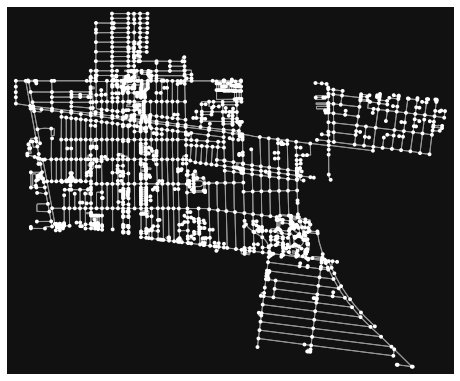

In [10]:

fig, ax = ox.plot_graph(HB)

In [11]:
HB_gdfnodes, HB_gdfedges = ox.graph_to_gdfs(HB)

We prepare to graph nodes and edges,afterwards we  get a random sample nodes

In [12]:
HB_gdfnodes.sample(10)

,y,x,highway,street_count,geometry
osmid,,,,,
1796806904,33.974946,-118.208589,NaN,4,POINT (-118.20859 33.97495)
7862189145,33.981934,-118.226543,NaN,3,POINT (-118.22654 33.98193)
6807947565,33.978766,-118.220498,NaN,1,POINT (-118.22050 33.97877)
123499900,33.984135,-118.191684,NaN,4,POINT (-118.19168 33.98414)
3695927710,33.987203,-118.225937,NaN,3,POINT (-118.22594 33.98720)
3702005891,33.974850,-118.210669,NaN,1,POINT (-118.21067 33.97485)
3695737987,33.976903,-118.220653,NaN,4,POINT (-118.22065 33.97690)
8337566375,33.983809,-118.198389,NaN,3,POINT (-118.19839 33.98381)
6457168268,33.978396,-118.236525,NaN,1,POINT (-118.23652 33.97840)


In [13]:
HB_gdfnodes

,y,x,highway,street_count,geometry
osmid,,,,,
73676059,33.981691,-118.236228,traffic_signals,5,POINT (-118.23623 33.98169)
73676194,33.981636,-118.230279,traffic_signals,4,POINT (-118.23028 33.98164)
73676213,33.981634,-118.225203,traffic_signals,4,POINT (-118.22520 33.98163)
73700966,33.986801,-118.237337,traffic_signals,4,POINT (-118.23734 33.98680)
73745139,33.978930,-118.235627,NaN,3,POINT (-118.23563 33.97893)
...,...,...,...,...,...
9252168426,33.989140,-118.237529,traffic_signals,3,POINT (-118.23753 33.98914)
9252589321,33.973542,-118.215398,NaN,3,POINT (-118.21540 33.97354)
9252589326,33.973220,-118.215679,NaN,3,POINT (-118.21568 33.97322)


Next we are listing the column names within the file

In [14]:
HB_gdfedges.head()

osmid   lanes  \
u        v          key                                              
73676059 305460018  0                            399256496       5   
         8370231218 0                            399256524     NaN   
         305459904  0               [399256497, 399256508]  [4, 5]   
         305459861  0    [187124116, 187124125, 399256527]       2   
         305459839  0    [778223347, 778223348, 778223349]       3   

                                                 name    highway  oneway  \
u        v          key                                                    
73676059 305460018  0                  Alameda Street    primary   False   
         8370231218 0                East Gage Avenue  secondary   False   
         305459904  0                  Alameda Street    primary   False   
         305459861  0    [E Gage Avenue, Gage Avenue]  secondary   False   
         305459839  0    [E Gage Avenue, Gage Avenue]  secondary   False   

                         length  \
u        v          key           
73676059 305460018  0    52.062   
         8370231218 0    20.015   
         305459904  0    56.077   
         305459861  0    37.436   
         305459839  0    57.821   

                                                                  geometry  \
u        v          key                                                      
73676059 305460018  0    LINESTRING (-118.23623 33.98169, -118.23633 33...   
         8370231218 0    LINESTRING (-118.23623 33.98169, -118.23643 33...   
         305459904  0    LINESTRING (-118.23623 33.98169, -118.23617 33...   
         305459861  0    LINESTRING (-118.23623 33.98169, -118.23614 33...   
         305459839  0    LINESTRING (-118.23623 33.98169, -118.23610 33...   

                        bridge access service width tunnel  
u        v          key                                     
73676059 305460018  0      NaN    NaN     NaN   NaN    NaN  
         8370231218 0      NaN    NaN     NaN   NaN    NaN  
         305459904  0      NaN    NaN     NaN   NaN    NaN  
         305459861  0      yes    NaN     NaN   NaN    NaN  
         305459839  0      yes    NaN     NaN   NaN    NaN

By plotting the edges we see the outline of Huntington Beach, I blew the size up to 15 to make the figue larger

<AxesSubplot:>

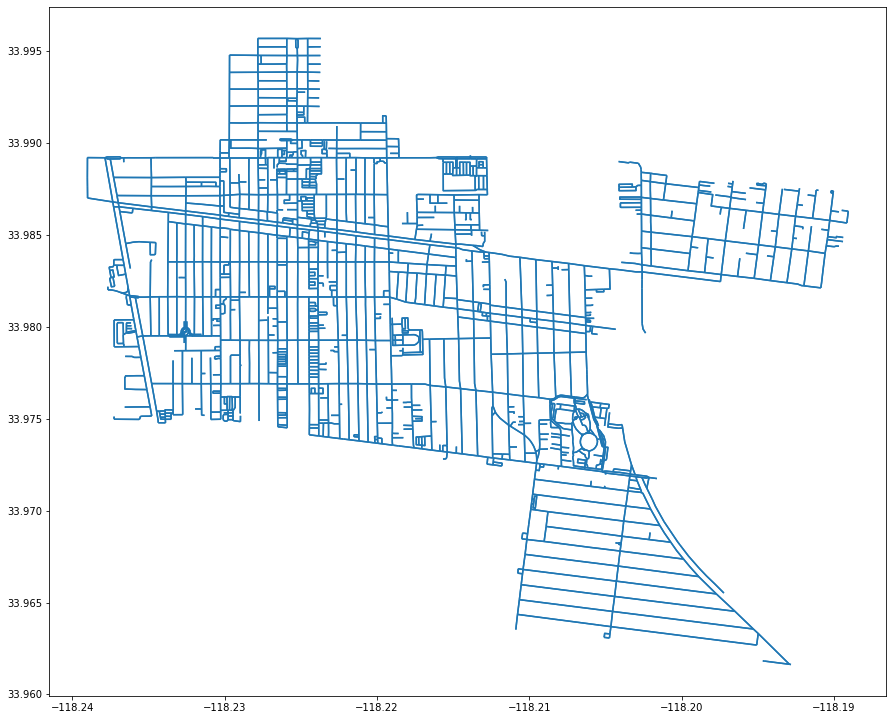

In [15]:
HB_gdfedges.plot(figsize=(15,15))

Now we called to plot Huntington Park and we see the figure size a bit bigger.

In [19]:
HB_gdfedges['name'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


Randolph Street                  140
Gage Avenue                      114
East Slauson Avenue              106
East Florence Avenue              98
Rita Avenue                       88
                                ... 
[Bissell Place, Benedict Way]      2
Hawkins Circle                     2
East 64th Street                   2
[Belgrave Avenue, Oak Street]      2
East 65th Street                   2
Name: name, Length: 96, dtype: int64

Calling the name of streets we see how many times streetssuch as Slauson and Florence are called which is crucial in relation to the transit oriented districts

In [20]:
stats = ox.basic_stats(HB, circuity_dist='euclidean')
stats

/opt/conda/lib/python3.9/site-packages/osmnx/stats.py:317: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


{'n': 1630,
 'm': 4630,
 'k_avg': 5.680981595092025,
 'edge_length_total': 316998.39999999874,
 'edge_length_avg': 68.46617710583126,
 'streets_per_node_avg': 2.932515337423313,
 'streets_per_node_counts': {0: 0, 1: 223, 2: 0, 3: 1076, 4: 326, 5: 5},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.13680981595092023,
  2: 0.0,
  3: 0.660122699386503,
  4: 0.2,
  5: 0.003067484662576687},
 'intersection_count': 1407,
 'street_length_total': 158499.20000000022,
 'street_segment_count': 2315,
 'street_length_avg': 68.46617710583163,
 'circuity_avg': 1.0390119431821756,
 'self_loop_proportion': 0.0021598272138228943}

By finding the minimum and maximum bounds for x and y, this helps us to prepare for the calculating the centroid

In [21]:
minx, miny, maxx, maxy = HB_gdfnodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-118.239006
33.961626
-118.1890649
33.9957007


With those numbers we calculate to find the centroid

In [22]:
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-118.21403545000001
33.978663350000005


By bounding the box coordinates, this gives us numbers to calculate the centroid for our isochrone which we are able to find the nearest node

In [23]:

center_node = ox.distance.nearest_nodes(HB,Y=centroid_y,X=centroid_x)
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 122893333


Next we call center node and record

In [24]:

HB_gdfnodes.loc[[center_node]]

,y,x,highway,street_count,geometry
osmid,,,,,
122893333,33.979379,-118.213634,NaN,4,POINT (-118.21363 33.97938)


Next, we begin to plot of the map, however, I am unsure if my basemap is projecting (I don't think so)  

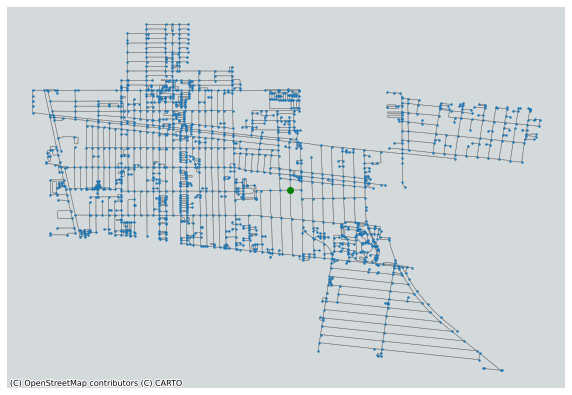

In [27]:

fig, ax = plt.subplots(figsize=(10,10))

HB_gdfedges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)


HB_gdfnodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)


HB_gdfnodes.loc[[center_node]].plot(ax=ax,
                                  color='g', 
                                  zorder=30)


ax.axis('off')


ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

In [30]:

HB_gdfedges['walk_time'] = HB_gdfedges['length']/meters_per_minute

Now we are solving for the walking time then getting a sample of the data 

In [31]:
HB_gdfedges[['osmid','name','highway','length','walk_time']].sample(10)

,,,osmid,name,highway,length,walk_time
u,v,key,,,,,
7451242344,7863391090,0,47474506,Rugby Avenue,residential,41.288,0.485741
3695737976,3695737977,0,365573325,NaN,service,62.422,0.734376
1775467096,6304062197,0,608158211,Santa Ana Street,tertiary,9.760,0.114824
4984173009,4984173012,0,509137076,NaN,service,43.144,0.507576
7174681302,123602569,0,165899810,Albany Street,residential,43.965,0.517235
4619158673,4619158651,0,467269267,NaN,footway,16.426,0.193247
7562985905,7562985904,0,808797675,NaN,service,9.741,0.114600
3576308927,8835526549,0,351823280,NaN,service,13.799,0.162341
7263485252,73676194,0,398256015,Gage Avenue,secondary,29.248,0.344094


Now are are assigning the colors for the isochrone maps, we then reverse colors

In [86]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='ocean', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#008000', '#000055', '#0080aa', '#ffffff']


In [87]:
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#008000', '#000055', '#0080aa', '#ffffff']


In [88]:
# create a list of "zipped" time/colors
colour_t = list(zip(trip_times, iso_colors))
colour_t

[(20, '#008000'), (15, '#000055'), (10, '#0080aa'), (5, '#ffffff')]

In [89]:
# loop through the list of time/colors
for time,color in list(colour_t):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 20 minutes is #008000
The color for 15 minutes is #000055
The color for 10 minutes is #0080aa
The color for 5 minutes is #ffffff


within this for loop we can caluclate how many nodes are per isochrone layers

In [90]:

for time, color in list(colour_t):

   
    subgraph = nx.ego_graph(HB, center_node, radius=time)

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    
    for node in subgraph.nodes():
        HB_gdfnodes.loc[node,'time'] = str(time) + ' mins'
        HB_gdfnodes.loc[node,'color'] = color

There are 1035 nodes within 20 minutes 
There are 615 nodes within 15 minutes 
There are 280 nodes within 10 minutes 
There are 75 nodes within 5 minutes 


In [42]:
HB_gdfnodes.sample(10)

,y,x,highway,street_count,geometry,time,color
osmid,,,,,,,
6804987739,33.988536,-118.221731,NaN,1,POINT (-118.22173 33.98854),15 mins,#9c179e
7811930098,33.981634,-118.229876,NaN,3,POINT (-118.22988 33.98163),NaN,NaN
3695737996,33.979277,-118.224451,NaN,4,POINT (-118.22445 33.97928),15 mins,#9c179e
3576308926,33.990627,-118.221074,NaN,3,POINT (-118.22107 33.99063),20 mins,#0d0887
4765336221,33.975782,-118.208646,NaN,3,POINT (-118.20865 33.97578),10 mins,#ed7953
122786498,33.989214,-118.221405,NaN,3,POINT (-118.22141 33.98921),15 mins,#9c179e
122638319,33.983536,-118.222631,NaN,4,POINT (-118.22263 33.98354),15 mins,#9c179e
123438206,33.985354,-118.225220,NaN,4,POINT (-118.22522 33.98535),15 mins,#9c179e
6805150575,33.976651,-118.225956,NaN,3,POINT (-118.22596 33.97665),20 mins,#0d0887


inputting the NaN values to a colour

In [44]:
HB_gdfnodes['color'].fillna('#cccccc', inplace=True)

In [ ]:
Now we can which nodes assigned to which colour

In [45]:
HB_gdfnodes.sample(10)

,y,x,highway,street_count,geometry,time,color
osmid,,,,,,,
6790499126,33.988469,-118.226005,NaN,4,POINT (-118.22600 33.98847),NaN,#cccccc
8410678950,33.980333,-118.212751,NaN,3,POINT (-118.21275 33.98033),5 mins,#f0f921
3694087183,33.975839,-118.205314,NaN,3,POINT (-118.20531 33.97584),15 mins,#9c179e
122774996,33.976892,-118.220033,NaN,4,POINT (-118.22003 33.97689),10 mins,#ed7953
7819460445,33.986770,-118.195118,NaN,1,POINT (-118.19512 33.98677),20 mins,#0d0887
122893326,33.979332,-118.216551,NaN,3,POINT (-118.21655 33.97933),5 mins,#f0f921
6790499118,33.988600,-118.225213,NaN,3,POINT (-118.22521 33.98860),NaN,#cccccc
2480872206,33.985602,-118.232557,NaN,4,POINT (-118.23256 33.98560),NaN,#cccccc
7522308579,33.985662,-118.226203,NaN,3,POINT (-118.22620 33.98566),20 mins,#0d0887


Now we plot out the nodes and can see the colours

<AxesSubplot:>

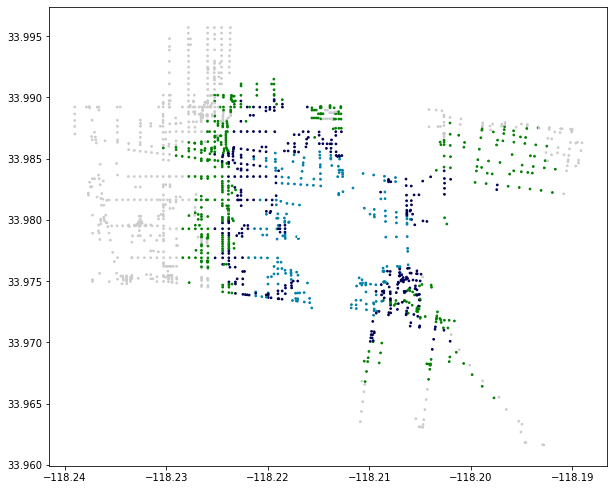

In [91]:
HB_gdfnodes.plot(figsize=(10,10),
               color= HB_gdfnodes['color'],
               markersize=3)

With those nodeswe add it to the outline map of Huntington Beach

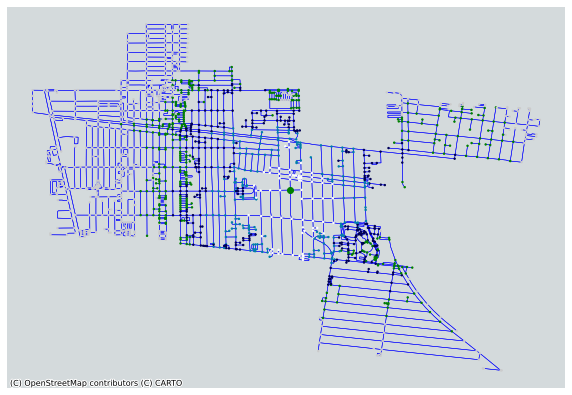

In [92]:

fig, ax = plt.subplots(figsize=(10,10))


HB_gdfedges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='blue',
               zorder=10)


HB_gdfnodes.plot(ax=ax,
               color=HB_gdfnodes['color'],
               markersize=2, 
               zorder=20)

HB_gdfnodes.loc[[center_node]].plot(ax=ax,
                                  color='g', 
                                  zorder=30)


ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

Now we can create the polygons for the nodes per time 

<AxesSubplot:>

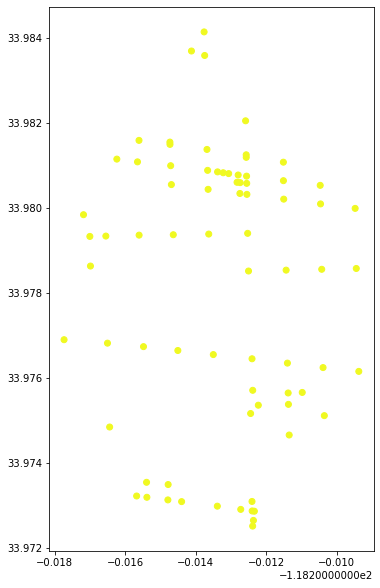

In [51]:
HB_gdfnodes[HB_gdfnodes['time']=='5 mins']


HB_gdf5 = HB_gdfnodes[HB_gdfnodes['time']=='5 mins']


HB_gdf5.plot(figsize=(10,10),color=HB_gdf5.color)

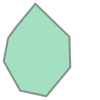

In [93]:
HB_gdf5.unary_union.convex_hull

In [ ]:
Since we connected the polygones, we can now get rid of the nodes

In [54]:
isochrones = HB_gdfnodes.dissolve("time")
isochrones

,geometry,y,x,highway,street_count,color
time,,,,,,
10 mins,"MULTIPOINT (-118.22189 33.97691, -118.22137 33...",33.981348,-118.218108,turning_circle,3,#ed7953
15 mins,"MULTIPOINT (-118.22522 33.98535, -118.22520 33...",33.987198,-118.219308,traffic_signals,3,#9c179e
20 mins,"MULTIPOINT (-118.23028 33.98587, -118.22904 33...",33.981634,-118.225203,traffic_signals,4,#0d0887
5 mins,"MULTIPOINT (-118.21774 33.97690, -118.21719 33...",33.980634,-118.211517,stop,4,#f0f921


In [55]:
isochrones = isochrones.convex_hull.reset_index()
isochrones

,time,0
0,10 mins,"POLYGON ((-118.20958 33.97221, -118.21567 33.9..."
1,15 mins,"POLYGON ((-118.20380 33.96943, -118.20990 33.9..."
2,20 mins,"POLYGON ((-118.19773 33.96547, -118.21041 33.9..."
3,5 mins,"POLYGON ((-118.21239 33.97251, -118.21568 33.9..."


We rename some columns to see the time and the longitude and latitude, the we use the.head command to make sure it is renamed

In [56]:
isochrones.columns=['time','geometry']

In [57]:
isochrones.head()

,time,geometry
0,10 mins,"POLYGON ((-118.20958 33.97221, -118.21567 33.9..."
1,15 mins,"POLYGON ((-118.20380 33.96943, -118.20990 33.9..."
2,20 mins,"POLYGON ((-118.19773 33.96547, -118.21041 33.9..."
3,5 mins,"POLYGON ((-118.21239 33.97251, -118.21568 33.9..."


The map created highlights the isochrone layers, by tinkering with the cmap we see the various colours 

<AxesSubplot:>

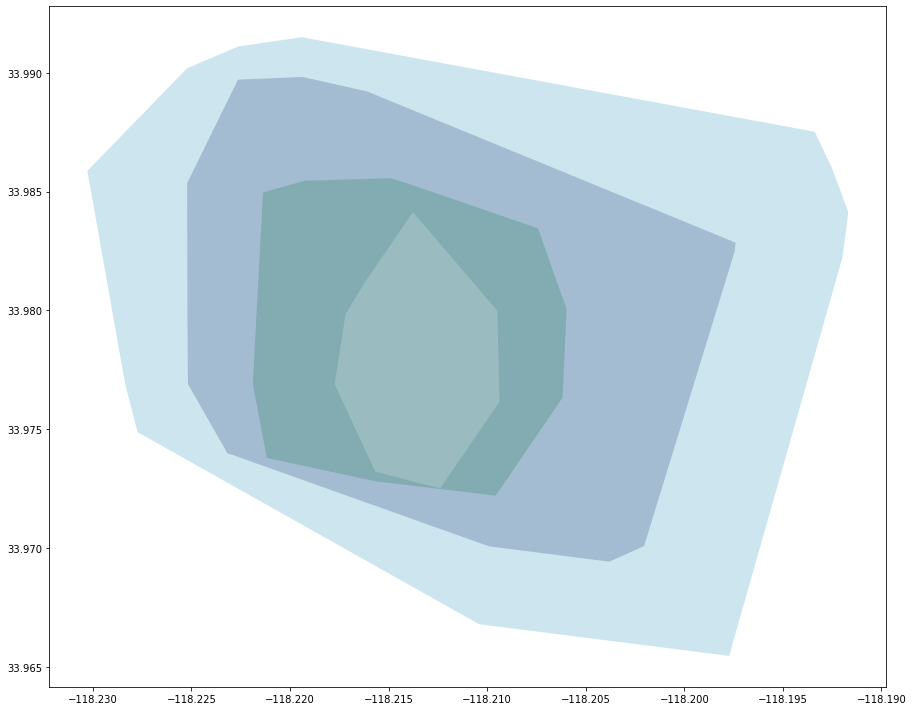

In [73]:
isochrones.plot(figsize=(15,15),alpha=0.2,cmap='ocean')

To finalize we , subplot, add the center node in a color like green so it is detectable, add all the nodes +edges, hides the axis, and a basemap to the isochrone. Lastly we give it a title

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


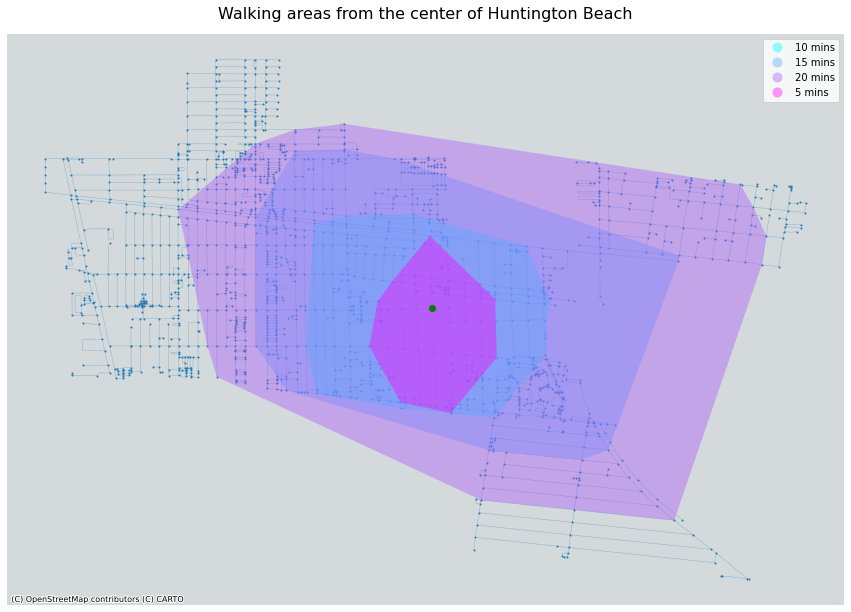

In [77]:

fig, ax = plt.subplots(figsize=(15,15))


isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='cool', 
                legend=True,
                zorder=20)


HB_gdfnodes.loc[[center_node]].plot(ax=ax,color='g', zorder=30)


HB_gdfnodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)


HB_gdfedges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)


ax.axis('off')


ax.set_title('Walking areas from the center of ' + 'Huntington Beach',fontsize=16,pad=15)


ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

We finally have our walking isochrone map of Huntington Beach